# Natural Language Processing Project
   ## News classification model

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import re
import nltk
import string as st
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline
import tkinter as tk
import customtkinter

In [2]:
df = pd.read_csv(r'D:\datasets\BBC News Train.csv')
pd.options.display.max_columns=None
df.head()


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


# check if we have duplicated rows

In [3]:
df.duplicated().sum()

0

In [4]:
df.shape

(1490, 3)

# atternative to info

In [5]:
def columns_info(df):
    colms = []
    dtypes = []
    unique = []
    nunique = []
    nulls = []
    
    for colm in df.columns:
        colms.append(colm)
        dtypes.append(df[colm].dtypes)
        unique.append(df[colm].unique())
        nunique.append(df[colm].nunique())
        nulls.append(df[colm].isna().sum())
        
    return pd.DataFrame({'Columns':colms ,
                         'Data Types': dtypes,
                         'Unique values':unique,
                         'Number of unique': nunique,
                         'missing values':nulls})  
columns_info(df)

,Columns,Data Types,Unique values,Number of unique,missing values
0,ArticleId,int64,"[1833, 154, 1101, 1976, 917, 1582, 651, 1797, ...",1490,0
1,Text,object,[worldcom ex-boss launches defence lawyers def...,1440,0
2,Category,object,"[business, tech, politics, sport, entertainment]",5,0


# preprocessing

## 1-text

In [6]:
def remove_tags(text):
  remove = re.compile(r'<.*?>')
  return re.sub(remove, '', text)
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
def convert_lower(text):
    return text.lower()
def remove_punc(txt):
    txt_nopunt="".join([c for c in txt if c not in st.punctuation])
    return txt_nopunt

In [7]:
df['Text']=df['Text'].apply(remove_tags)
df['Text']=df['Text'].apply(remove_punc)
df['Text']=df['Text'].apply(special_char)
df['Text']=df['Text'].apply(convert_lower)
df['Text']=df['Text'].apply(remove_stopwords)
df['Text']=df['Text'].apply(lemmatize_word)
df['Text']


0       worldcom exboss launch defence lawyer defendin...
1       german business confidence slide german busine...
2       bbc poll indicates economic gloom citizen majo...
3       lifestyle governs mobile choice faster better ...
4       enron boss 168m payout eighteen former enron d...
                              ...                        
1485    double eviction big brother model caprice holb...
1486    dj double act revamp chart show dj duo jk joel...
1487    weak dollar hit reuters revenue medium group r...
1488    apple ipod family expands market apple expande...
1489    santy worm make unwelcome visit thousand websi...
Name: Text, Length: 1490, dtype: object

## 2-Category

In [8]:
df['CategoryId'] = df['Category'].factorize()[0]
df.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom exboss launch defence lawyer defendin...,business,0
1,154,german business confidence slide german busine...,business,0
2,1101,bbc poll indicates economic gloom citizen majo...,business,0
3,1976,lifestyle governs mobile choice faster better ...,tech,1
4,917,enron boss 168m payout eighteen former enron d...,business,0


# Category visualization


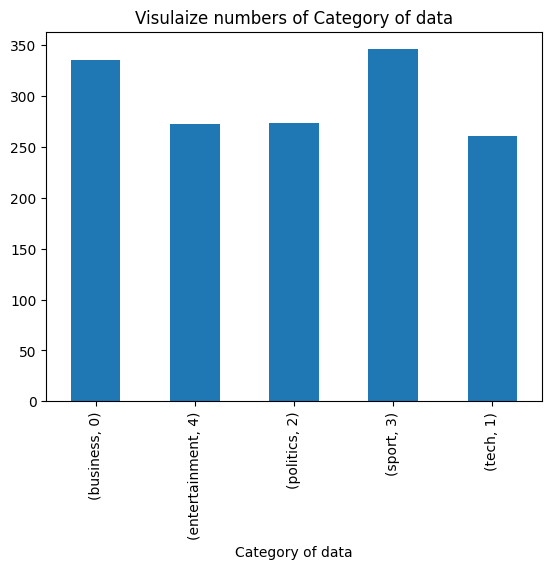

In [9]:
df.groupby('Category').CategoryId.value_counts().plot(kind = "bar")
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

# machinelearning Part

In [11]:
x = df['Text']
y = df['CategoryId']

In [20]:
x = np.array(df.Text.values)
y = np.array(df.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(df.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (1490, 5000)
y.shape =  (1490,)


In [21]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(len(x_train))
print(len(x_test))

1192
298


In [23]:
classifier = MultinomialNB().fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)
y_pred
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.97      0.97      0.97        58
           2       0.95      0.96      0.96        56
           3       1.00      1.00      1.00        63
           4       1.00      0.98      0.99        46

    accuracy                           0.98       298
   macro avg       0.98      0.98      0.98       298
weighted avg       0.98      0.98      0.98       298



# GUI part

In [27]:
root=customtkinter.CTk()
root.geometry("1150x400")
root.title("News Classifcation")

customtkinter.set_default_color_theme("dark-blue")

label1 = customtkinter.CTkLabel(root,text="Enter news",font=("Arial", 16),text_color="white")

label2 = tk.Label(root, text="", font=("Arial", 16),fg="white",bg="#1a1a1a")

entry = customtkinter.CTkTextbox(root,width=850)

def predict():
    label2.config(text="")
    
    text = entry.get("1.0", "end-1c")
    if text=="":
        label2.config(text="NO DATA ENTERED")
    else:
            text = cv.transform([text])
            prediction = classifier.predict(text)
            if prediction == [0]:
                label2.config(text="Business News")
            elif prediction == [1]:
                label2.config(text="Tech News")
            elif prediction == [2]:
                label2.config(text="Politics News")
            elif prediction == [3]:
                label2.config(text="Sports News")
            elif prediction == [4]:
                label2.config(text="Entertainment News")

        
button = customtkinter.CTkButton(root,font=("Arial", 16) ,text="Predict",command=predict,text_color="white")

label1.place(x=400,y=10)
entry.place(x=20,y=60)
button.place(x=955,y=235)
label2.place(x=920,y=150)
root.mainloop()